In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import osmnx as ox
import folium
import networkx as nx

In [5]:
graph = ox.graph_from_address("Salviano, Livorno, Italy", network_type='drive')

In [6]:
ox.graph_to_gdfs(graph, nodes=False).explore()

In [36]:
archi = ox.graph_to_gdfs(graph, nodes=False)

archi.head()

osmid  \
u         v         key                                                      
39895543  256438132 0                   [1178093920, 23682067, 1178093919]   
          276232338 0                                            653782029   
243768828 39895543  0    [29858816, 112402305, 653782029, 1176346289, 3...   
256432285 277383030 0                                             23814481   
          317641984 0                                             35205007   

                         oneway lanes     highway maxspeed reversed    length  \
u         v         key                                                         
39895543  256438132 0      True     1  trunk_link       40    False   164.771   
          276232338 0      True     2       trunk       90    False   234.595   
243768828 39895543  0      True     2       trunk       90    False  1467.464   
256432285 277383030 0     False   NaN    tertiary      NaN     True    13.270   
          317641984 0      True     2   secondary       50    False   172.876   

                        bridge  \
u         v         key          
39895543  256438132 0      yes   
          276232338 0      NaN   
243768828 39895543  0      yes   
256432285 277383030 0      NaN   
          317641984 0      NaN   

                                                                  geometry  \
u         v         key                                                      
39895543  256438132 0    LINESTRING (10.33453 43.53510, 10.33419 43.534...   
          276232338 0    LINESTRING (10.33453 43.53510, 10.33434 43.534...   
243768828 39895543  0    LINESTRING (10.34157 43.54726, 10.34136 43.546...   
256432285 277383030 0    LINESTRING (10.32691 43.54406, 10.32675 43.54406)   
          317641984 0    LINESTRING (10.32691 43.54406, 10.32701 43.544...   

                         ref                      name tunnel junction access  \
u         v         key                                                         
39895543  256438132 0    NaN                       NaN    NaN      NaN    NaN   
          276232338 0    SS1  Strada Statale 1 Aurelia    NaN      NaN    NaN   
243768828 39895543  0    SS1  Strada Statale 1 Aurelia    NaN      NaN    NaN   
256432285 277383030 0    NaN                       NaN    NaN      NaN    NaN   
          317641984 0    NaN  Viale Francesco Petrarca    NaN      NaN    NaN   

                        width  
u         v         key        
39895543  256438132 0     NaN  
          276232338 0     NaN  
243768828 39895543  0     NaN  
256432285 277383030 0     NaN  
          317641984 0     NaN

In [8]:
print(archi[archi.index == (39895543, 243768828, 0)].name.iloc[0])
print(archi[archi.index == (243768828, 39895543, 0)].name.iloc[0])

IndexError: single positional indexer is out-of-bounds

In [11]:
archi.reset_index().to_dict(orient="records")[:1]

[{'u': 39895543,
  'v': 256438132,
  'key': 0,
  'osmid': [1178093920, 23682067, 1178093919],
  'oneway': True,
  'lanes': '1',
  'highway': 'trunk_link',
  'maxspeed': '40',
  'reversed': False,
  'length': 164.77100000000002,
  'bridge': 'yes',
  'geometry': <LINESTRING (10.335 43.535, 10.334 43.535, 10.334 43.535, 10.334 43.534, 10....>,
  'ref': nan,
  'name': nan,
  'tunnel': nan,
  'junction': nan,
  'access': nan,
  'width': nan}]

In [12]:
archi[archi.index == (39895543, 243768828, 0)].name.iloc[0]

IndexError: single positional indexer is out-of-bounds

In [13]:
archi.total_bounds

array([10.3250338, 43.5309018, 10.3499262, 43.5488231])

In [14]:
df = pd.read_csv("tracks_1/track_points.csv")

df

,X,Y,track_fid,track_seg_id,track_seg_point_id,ele,time,course,speed,magvar,...,urlname,sym,type,fix,sat,hdop,vdop,pdop,ageofdgpsdata,dgpsid
0,10.327522,43.548705,0,0,0,NaN,2023/01/15 00:04:46+00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10.327535,43.548582,0,0,1,NaN,2023/01/15 00:04:47+00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10.327553,43.548459,0,0,2,NaN,2023/01/15 00:04:48+00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10.327566,43.548335,0,0,3,NaN,2023/01/15 00:04:49+00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10.327580,43.548215,0,0,4,NaN,2023/01/15 00:04:50+00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,10.339320,43.531406,16,0,152,NaN,2023/03/15 00:08:57+00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4996,10.339502,43.531409,16,0,153,NaN,2023/03/15 00:08:58+00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4997,10.339723,43.531422,16,0,154,NaN,2023/03/15 00:08:59+00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4998,10.339883,43.531447,16,0,155,NaN,2023/03/15 00:09:00+00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
from tqdm.auto import tqdm

trajectory_df = df[df.track_fid == 2]
map_center = [trajectory_df['Y'].mean(), df['X'].mean()]
my_map = folium.Map(location=map_center, zoom_start=12)

for index, row in tqdm(trajectory_df.iterrows()):
    folium.Marker(
        location=[row['Y'], row['X']],
        popup=row['time']
    ).add_to(my_map)
    
my_map

0it [00:00, ?it/s]

In [46]:
from CaGeo.algorithms import BasicFeatures

lat = trajectory_df['X'].values
lon = trajectory_df['Y'].values

angles = BasicFeatures.direction(lat, lon)[1:]
distance = BasicFeatures.distance(lat, lon)[1:]

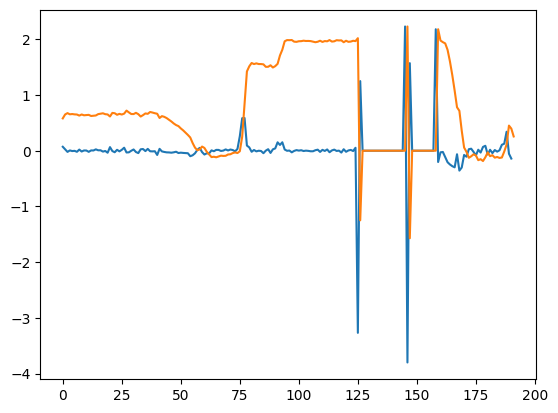

In [47]:
plt.plot(np.diff(angles))
plt.plot(angles)

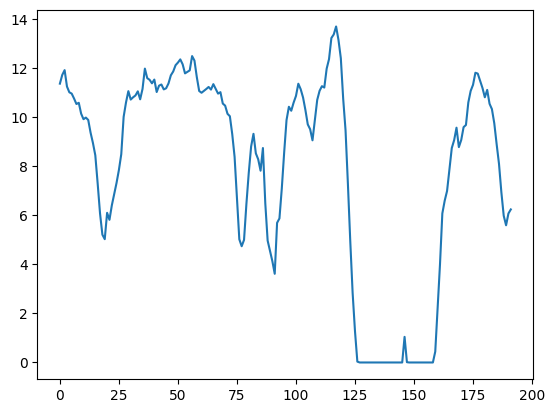

In [48]:
plt.plot(distance*1000)

In [81]:
def resample(original_lat, original_lon, dist, limite = 10):
    dist = [0] + dist.copy()
    lat = [original_lat[0]]
    lon = [original_lon[0]]

    current_dist = .0

    for i in range(len(original_lat)):
        if current_dist + dist[i] > 10:
            missing_dist = limite - current_dist
            missing_perc = missing_dist/dist[i]
            

In [82]:
resample_trajectory(lat, lon, 10)

ZeroDivisionError: division by zero

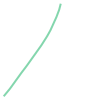

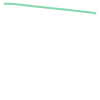

In [67]:
start = 256432285

def

for el in list(graph.neighbors(start)):
    arch = graph.get_edge_data(start, el)[0]
    if "geometry" not in arch:
        continue

    display(arch["geometry"])

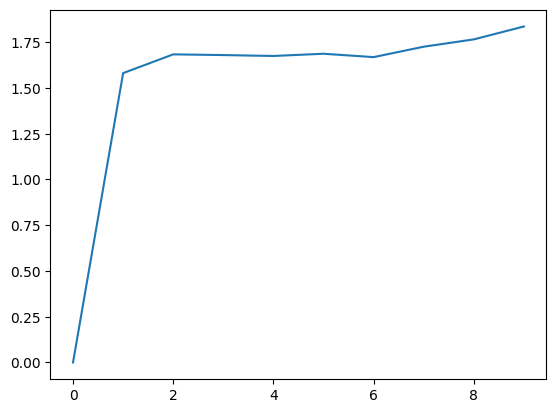

In [74]:
lat = np.array([x[0] for x in arch["geometry"].coords])
lon = np.array([x[1] for x in arch["geometry"].coords])

plt.plot(BasicFeatures.direction(lat, lon))

In [53]:
archi[archi.name == "Viale Francesco Petrarca"].iloc[:1]

,,,osmid,oneway,lanes,highway,maxspeed,reversed,length,bridge,geometry,ref,name,tunnel,junction,access,width
u,v,key,,,,,,,,,,,,,,,
256432285,317641984,0,35205007,True,2,secondary,50,False,172.876,NaN,"LINESTRING (10.32691 43.54406, 10.32701 43.544...",NaN,Viale Francesco Petrarca,NaN,NaN,NaN,NaN


In [37]:
grafi = []
archi_petrarca = archi[archi.name == "Viale Francesco Petrarca"].reset_index().to_dict(orient="records")

arco = archi.pop()

while len(archi) != 0:
    



In [39]:
archi_petrarca.pop()

{'u': 7913945422,
 'v': 276232259,
 'key': 0,
 'osmid': 735078715,
 'oneway': True,
 'lanes': '2',
 'highway': 'secondary',
 'maxspeed': '50',
 'reversed': False,
 'length': 13.667,
 'bridge': nan,
 'geometry': <LINESTRING (10.328 43.546, 10.328 43.545)>,
 'ref': nan,
 'name': 'Viale Francesco Petrarca',
 'tunnel': nan,
 'junction': nan,
 'access': nan,
 'width': nan}